# <span style="color:blue">EVAC Workshop 4: Genetic Programming</span>

**Module leader**

Simon O'Keefe: simon.okeefe@york.ac.uk

**Graduate Teaching Assistants**

Danny Roberts: danny.roberts@york.ac.uk

Tianda Sun: tianda.sun@york.ac.uk

## <span style="color:#0073e6">Prerequisites</span>

Before participating in this practical make sure that you have watched the pre-workshop materials:
- Lecture 4
- Code walkthrough 4

# Colab Packages Install

In [1]:
!pip3 install deap
!pip3 install seaborn

## Learning Objectives

- Learn how to program a standard GP in DEAP
- Learn what kinds of problems GP can be applied to
- Learn the basics of loosely-typed GP in DEAP

# <span style="color:blue">Exercise: Symbolic Regression with GP</span>

To learn genetic programming (GP) we will continue the regression theme and look at a regression problem that needs non-linear expressions. Symbolic regression is about learning equations. Whereas with a GA you need to specify what you think the best model is (e.g. polynomials etc.), with GP the algorithm can decide. This is useful when dealing with more complex data. Here, the data is simply generated by a known function against which we can evaluate.

# <span style="color:blue">Your Task</span>

Using what you know from the lecture and walkthrough: **Your task is to code a GP algorithm to solve a regression problem where the solution is the equation:**

$f(x)$ = $x^{4}$ - $x^{3}$ - $x^{2}$ - $x$

Once you have written your evaluation function, you can then set up a toolbox and register your evaluation function. When you do this, you can specify the range of values over which to assess the individual. Your fitness function should aim to evaluate the error between the individual’s expression and this actual data-generating function.

The code below would register our evaluation function 'evalSymbReg' and pass in argument 'points' which contains values from -10 to 10 every 0.1. Thus we register the range of values of x on which we want to evaluate.

In [2]:
import operator
import random
import pygraphviz as pgv
import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

In [3]:
from deap import base, creator, gp, tools

SET_ARITY = 1
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
pset = gp.PrimitiveSet("main", SET_ARITY)
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=3, max_=5)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)


def f(x):
    return (x**4) - (x**3) - (x**2) - x


def evalSymbReg(individual, points):
    func = toolbox.compile(expr=individual)
    fitness = 0
    for point in points:
        try:
            fitness += abs(func(point) - f(point))
        except:  # noqa: E722 -  Since we have powers, things like trying to raise to a negative power or overflows can happen. Kill off individuals that have these issues.
            return (100000000,)
    return (fitness,)

toolbox.register("evaluate", evalSymbReg, points=[x / 10.0 for x in range(-100, 100)])

import operator
import random

pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.pow, 2)
pset.addEphemeralConstant("randInt", lambda: random.randint(0, 6))
pset.renameArguments(ARG0="x")

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=5))
toolbox.decorate(
    "mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=5)
)




/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/deap/gp.py:254: RuntimeWarning: Ephemeral randInt function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


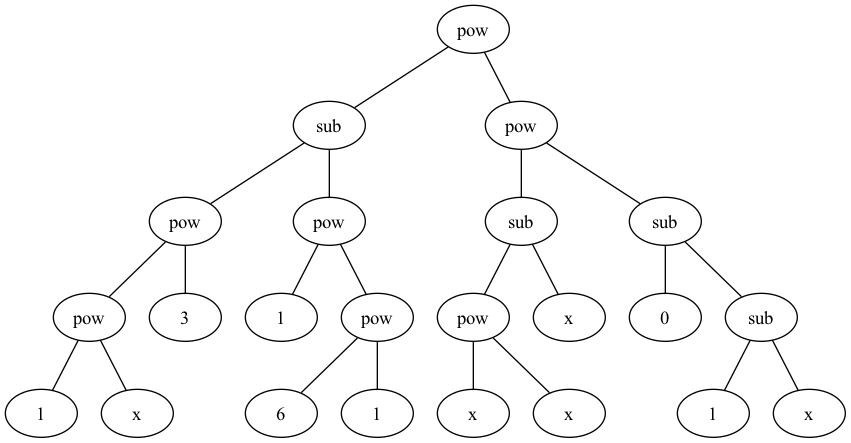

In [4]:
import pygraphviz as pgv
from IPython.display import Image

ind = toolbox.individual()

nodes, edges, labels = gp.graph(ind)
tree = pgv.AGraph()
tree.add_nodes_from(nodes)
tree.add_edges_from(edges)
tree.layout(prog="dot")

for i in nodes:
    n = tree.get_node(i)
    n.attr["label"] = labels[i]

treePlot = tree.draw(format="png", prog="dot")
Image(treePlot)

In [5]:
print(toolbox.evaluate(ind))


(100000000,)


In [6]:
import numpy

stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)
mstats.register("max", numpy.max)


In [7]:
from deap import algorithms

pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)

pop, log = algorithms.eaSimple(
    pop,
    toolbox,
    cxpb=0.5,
    mutpb=0.1,
    ngen=150,
    stats=mstats,
    halloffame=hof,
    verbose=True,
)

   	      	                          fitness                          	                      size                     
   	      	-----------------------------------------------------------	-----------------------------------------------
gen	nevals	avg         	gen	max         	min    	nevals	std	avg    	gen	max	min	nevals	std    
0  	300   	4.95352e+159	0  	1.48606e+162	61422.8	300   	inf	29.0933	0  	63 	15 	300   	15.7917
1  	163   	8.62624e+117	1  	2.58787e+120	52079.3	163   	1.49162e+119	26.0067	1  	63 	9  	163   	14.2478
2  	159   	6.24644e+283	2  	1.87393e+286	51984.9	159   	inf         	22.38  	2  	63 	3  	159   	10.9789
3  	189   	1.91908e+268	3  	5.75724e+270	50927.1	189   	inf         	20.7533	3  	63 	1  	189   	9.95887
4  	172   	1.97613e+142	4  	5.88215e+144	50905  	172   	3.39041e+143	22.0467	4  	63 	1  	172   	9.32011
5  	162   	1.27902e+95 	5  	3.83707e+97 	50255  	162   	2.21164e+96 	23.58  	5  	59 	1  	162   	7.82625


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


6  	178   	1.91908e+268	6  	5.75724e+270	6660.3 	178   	inf         	25.2   	6  	37 	3  	178   	7.4144 
7  	157   	3.34252e+107	7  	1.00276e+110	6660.3 	157   	5.77976e+108	24.0267	7  	37 	3  	157   	7.96237
8  	163   	6.71783e+97 	8  	1.00767e+100	6660.3 	163   	8.20015e+98 	22.22  	8  	37 	1  	163   	8.33576
9  	169   	6.08278e+57 	9  	1.82483e+60 	48379  	169   	1.05181e+59 	20.3267	9  	37 	1  	169   	7.70021
10 	165   	1.21658e+37 	10 	3.64974e+39 	26888  	165   	2.10366e+38 	20.42  	10 	35 	3  	165   	7.97142
11 	130   	1.31897e+69 	11 	3.95692e+71 	6660.3 	130   	2.28072e+70 	22.0867	11 	35 	3  	130   	8.44625
12 	182   	3.35487e+25 	12 	1.00646e+28 	6660.3 	182   	5.80111e+26 	23.2333	12 	37 	3  	182   	8.45925
13 	165   	1.21912e+37 	13 	3.65736e+39 	6660.3 	165   	2.10806e+38 	22.1333	13 	37 	3  	165   	9.10653
14 	167   	1.97909e+27 	14 	5.9369e+29  	6660.3 	167   	3.42195e+28 	22.06  	14 	35 	5  	167   	9.03824
15 	163   	1.21912e+37 	15 	3.65736e+39 	6660.3 	163   	2.10806e

sub(sub(pow(sub(sub(3, 5), 3), 1), pow(x, 3)), sub(sub(sub(x, 1), pow(x, 4)), pow(sub(4, pow(x, 2)), 1)))
(5.222489107836736e-12,)


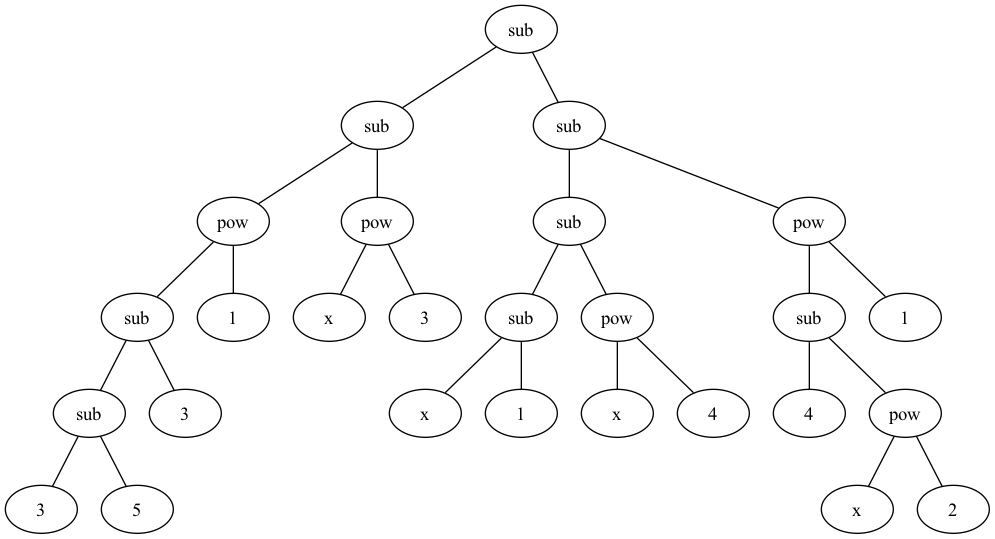

In [8]:
import pygraphviz as pgv
from IPython.display import Image
best_ind = tools.selBest(pop, 1)[0]
print(best_ind)
print(best_ind.fitness)
nodes, edges, labels = gp.graph(best_ind)

tree = pgv.AGraph()
tree.add_nodes_from(nodes)
tree.add_edges_from(edges)
tree.layout(prog="dot")

for i in nodes:
    n = tree.get_node(i)
    n.attr["label"] = labels[i]

treePlot = tree.draw(format="png", prog="dot")
Image(treePlot)

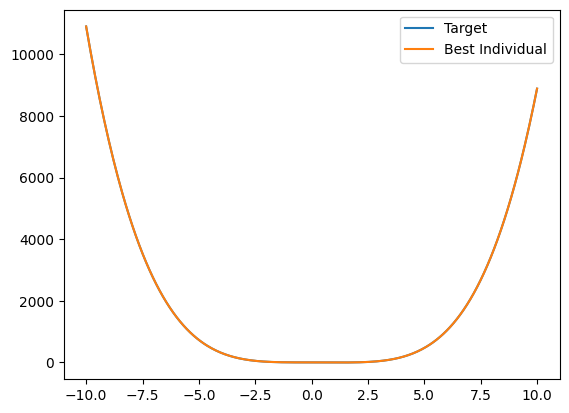

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x values
x = np.linspace(-10, 10, 400)

func = toolbox.compile(expr=best_ind)

# Plot the functions
plt.plot(x, f(x), label='Target')
plt.plot(x, func(x), label='Best Individual')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Whereas in the walkthrough I showed you how to fit to data, here, we are doing the same thing, but we are generating the data on-the-fly using the data-generating function that we have decided to use. We can change that function to be anything we want, and even add randomness to it if we like. We pass the individual to the evaluation function, just as we have always done previously. But we also pass the inputs that we want to evaluate. I choose to pass in a big range of points that are systematically generated, but you could chose to pass random x values if you like. This data-generating function that we are fitting to can be changed to anything you like (see later task).

**Once you have implemented a solution, be sure to output statistics, plot trees, and take a look at the final solution. Also, explore parameters and assumptions of the algorithm, etc.**
**Also be sure to run your code multiple times to see the impact of random starting conditions etc.**

Start with a more complex primitive set and experiment with changes to it. How much can you slim it down, and what impact does it have?

You will notice that the final solution performs well but is not very concise. This is common in GP and is called 'bloating'. Why do you think bloating happens? This is a topic covered in the next lecture and workshop.

# <span style="color:blue">Additional Task 1</span>

Add a static depth limit to your mutation and mating operators. Set the limit to 8. Remember that this limit is a limit on the overall depth of an individual. Re-run and look at the final tree.

# <span style="color:blue">Additional Task 2</span>

Let's change your evaluation function to something more difficult. For example, you could use something from the DEAP benchmarks such as deap.benchmarks.gp.ripple (see library reference). The ripple function takes in two arguments and is defined as:

$f(x)$ = ($x_{1} - 3$) - ($x_{2} - 3$) + 2sin(($x_{1} - 4$)($x_2 - 4$))

With range x $∈[-5,5$]^2

# <span style="color:blue">Additional Task 3</span>

You can actually implement multiple types of mutation functions in GP. Because of the tree structure, there are many different ways that you can change individuals.

Go to the DEAP library reference and read about the different gp mutation operators such as gp.mutShrink(), gp.mutNodeReplacement(), go.mutInsert(), and gp.mutEphemeral().

Implement gp.mutShrink() in to you code in addition to the current mutation operator.